# Analysis of proportions

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:
yes_cycles = [16, 9, 10, 13, 19, 20, 18, 17, 35, 55]
yes_others = [58, 90, 48, 57, 103, 57, 86, 112, 273, 64]
yes_total = [a + b for a, b in zip(yes_cycles, yes_others)]
yes_props = [a / b for a, b in zip(yes_cycles, yes_total)]

no_cycles = [12, 1, 2, 4, 9, 7, 9, 8]
no_others = [113, 18, 14, 44, 208, 67, 29, 154]
no_total = [a + b for a, b in zip(no_cycles, no_others)]
no_props = [a / b for a, b in zip(no_cycles, no_total)]

Assumptions:
- $y_1, ..., y_{10}$ are the proportions of traffic on bicycles in the residential streets with bike lanes
- $z_1, ..., z_8$ are the proportions of traffic on bicycles in the residential streets without bike lanes 
- $y_i$'s are IID, given $\theta_y$
- $z_i$'s are IID, given $\theta_z$

Model:
$$
\begin{align}
\alpha, \beta & \sim \text{HalfNormal}(2.0) \\ 
\theta_y, \theta_z & \sim \text{Beta}(\alpha, \beta) \\
y_i | \theta_y & \sim \text{Binomial}(n_{y_i}, \theta_y) \\ 
z_i | \theta_z & \sim \text{Binomial}(n_{z_i}, \theta_z) 
\end{align}
$$

In [3]:
coords = {"bike_route": ["Yes", "No"]}

with pm.Model(coords=coords) as m:
    alpha = pm.HalfNormal("alpha", sigma=2.0)
    beta = pm.HalfNormal("beta", sigma=0.2)
    thetas = pm.Beta("theta", alpha=alpha, beta=beta, dims="bike_route")
    diff = pm.Deterministic("diff", thetas[0] - thetas[1])

    yes_counts = pm.Binomial(
        "yes_counts",
        n=yes_total,
        p=thetas[0],
        observed=yes_cycles,
    )

    no_counts = pm.Binomial(
        "no_counts",
        n=no_total,
        p=thetas[1],
        observed=no_cycles,
    )

    trace = pm.sample(2000, tune=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


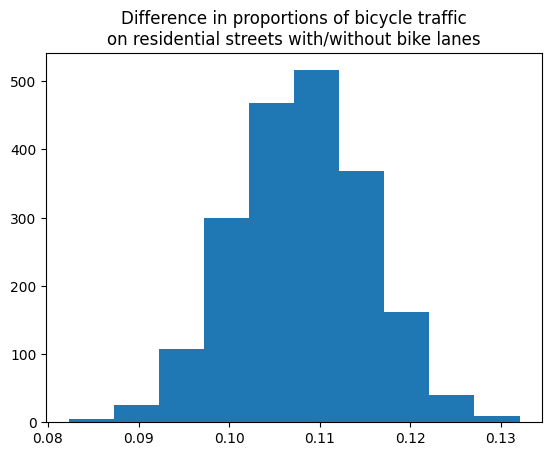

In [4]:
plt.hist(trace.posterior["diff"].mean("chain"))
plt.title(
    "Difference in proportions of bicycle traffic\n"
    "on residential streets with/without bike lanes"
)
plt.show()